In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import nltk

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error

dataset = pd.DataFrame.from_records(json.load(open('train.json'))).fillna("")

dataset['author_combined'] = dataset['author'].apply(lambda x: '?'.join(map(str, x)) if x is not None else '')
dataset['year'] = dataset['year'].astype(int)

### EDA

In [36]:
dataset['title'][14]

"Sens et usages d'un terme dans un réseau lexical évolutif"

In [37]:
dataset.dtypes

ENTRYTYPE          object
title              object
editor             object
year                int32
publisher          object
author             object
abstract           object
author_combined    object
dtype: object

In [38]:
dataset[0:5]

,ENTRYTYPE,title,editor,year,publisher,author,abstract,author_combined
0,inproceedings,Philippine Language Resources: Trends and Dire...,,2009,Association for Computational Linguistics,"[Roxas, Rachel Edita, Cheng, Charibeth, Lim, N...",,"Roxas, Rachel Edita?Cheng, Charibeth?Lim, Nath..."
1,inproceedings,A System for Translating Locative Prepositions...,,1991,Association for Computational Linguistics,"[Japkowicz, Nathalie, Wiebe, Janyce M.]",,"Japkowicz, Nathalie?Wiebe, Janyce M."
2,inproceedings,Introduction to the Shared Task on Comparing S...,,2008,College Publications,"[Bos, Johan]",,"Bos, Johan"
3,inproceedings,Pynini: A Python library for weighted finite-s...,,2016,Association for Computational Linguistics,"[Gorman, Kyle]",,"Gorman, Kyle"
4,inproceedings,Improving Readability of Swedish Electronic He...,,2014,Association for Computational Linguistics,"[Grigonyte, Gintarė, Kvist, Maria, Velupillai,...",,"Grigonyte, Gintarė?Kvist, Maria?Velupillai, Su..."


#### 'year'

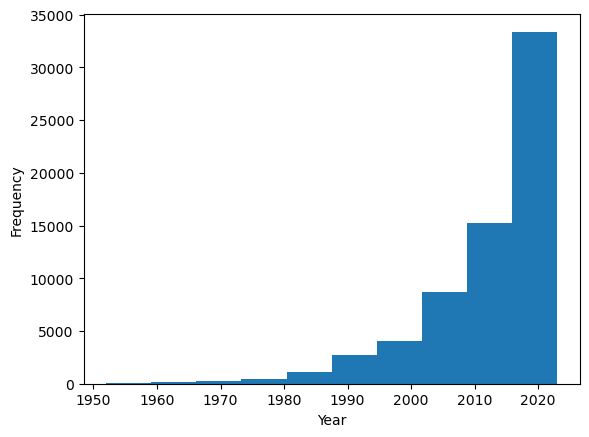

In [39]:
plt.hist(dataset['year'])
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

#### 'ENTRYTYPE'
https://tex.stackexchange.com/questions/516802/what-are-differences-amongst-conference-proceedings-and-inproceedings

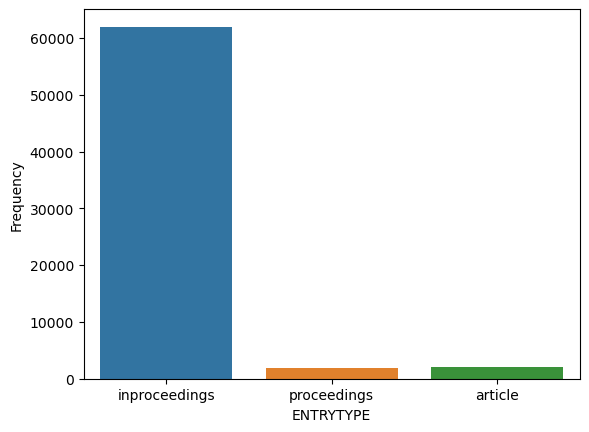

In [40]:
sns.countplot(data=dataset, x='ENTRYTYPE')
plt.xlabel("ENTRYTYPE")
plt.ylabel("Frequency")
plt.show()

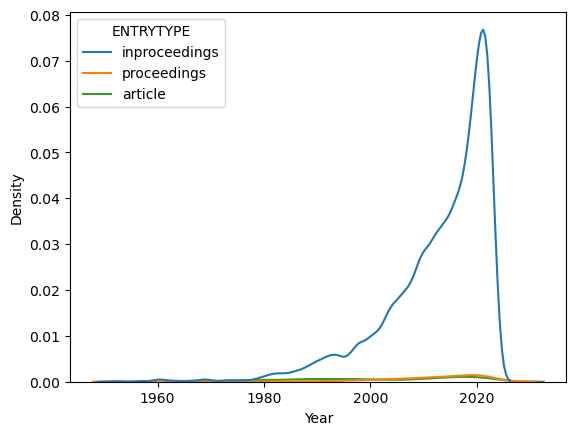

KeyboardInterrupt: 

In [ ]:
sns.kdeplot(dataset, x='year', hue='ENTRYTYPE')
plt.xlabel("Year")
plt.ylabel("Density")
plt.show()

In [ ]:
dataset['ENTRYTYPE']

0        inproceedings
1        inproceedings
2        inproceedings
3        inproceedings
4        inproceedings
             ...      
65909    inproceedings
65910      proceedings
65911          article
65912    inproceedings
65913    inproceedings
Name: ENTRYTYPE, Length: 65914, dtype: object

In [ ]:
ct = ColumnTransformer(
    [("onehot", OneHotEncoder(), ["ENTRYTYPE"])]
)

train, val = train_test_split(dataset, stratify=dataset['year'], random_state=123)

ct.fit(train)
train_trans = ct.transform(train)
print(train_trans.shape)

(49435, 3)


#### 'publisher'

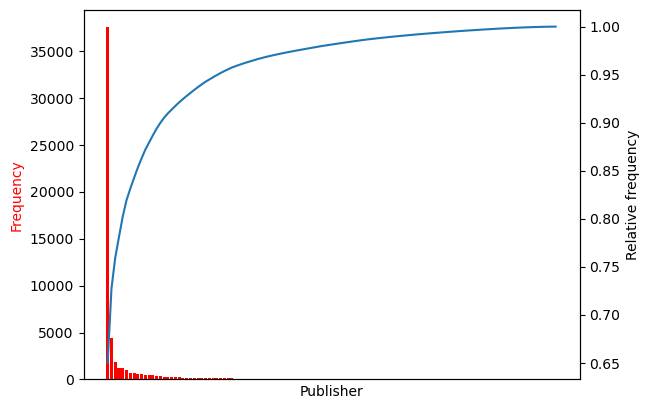

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Publisher")
ax1.set_ylabel("Frequency", color='red')
ax1.bar(dataset['publisher'].value_counts().index, dataset['publisher'].value_counts().values,
        color = 'red')

ax2 = ax1.twinx()
ax2.set_ylabel("Relative frequency")
ax2.plot(dataset['publisher'].value_counts().index, dataset['publisher'].value_counts().values.cumsum() / sum(dataset['publisher'].value_counts().values))

plt.xticks([])
plt.show()

In [ ]:
n = 15

value_counts = dataset['publisher'].value_counts()
proportion = sum(value_counts.values[0:n]) / sum(value_counts.values)

print(f"The top {n} publishers (out of {len(value_counts.index)}) make up {proportion*100:.1f}% of the dataset: ")
print()
print(value_counts[0:n])

The top 15 publishers (out of 120) make up 90.0% of the dataset: 

publisher
Association for Computational Linguistics                                                 37526
European Language Resources Association (ELRA)                                             4456
European Language Resources Association                                                    1844
ATALA                                                                                      1259
MIT Press                                                                                  1222
International Committee on Computational Linguistics                                        980
The Association for Computational Linguistics and Chinese Language Processing (ACLCLP)      691
European Association for Machine Translation                                                643
Asian Federation of Natural Language Processing                                             617
The COLING 2016 Organizing Committee                       

#### 'title'

In [11]:
X.toarray().shape

(65914, 29819)

In [10]:
cv = CountVectorizer()
X = cv.fit_transform(dataset['title'])

counts = X.sum(axis=0).A.ravel()
word_freq = pd.Series(counts, index=cv.get_feature_names_out()).sort_values(ascending=False)

print(f"Vocabulary size: {len(cv.vocabulary_)}")
print()

n = 30
print(f"Top {n} most occuring words: ")
print(word_freq[0:n])

Vocabulary size: 29819

Top 30 most occuring words: 
for            23714
of             20836
and            16472
in             13867
the            13663
language        7826
to              7281
with            6835
translation     6363
based           6156
on              5899
using           5054
learning        4690
machine         4585
text            3921
task            3657
from            3516
an              3421
word            3364
models          3162
semantic        3145
corpus          2906
neural          2904
system          2776
model           2701
analysis        2669
speech          2552
generation      2501
extraction      2395
data            2364
dtype: int64


In [ ]:
cv = CountVectorizer(min_df=10, stop_words='english')
X = cv.fit_transform(dataset['title'])

counts = X.sum(axis=0).A.ravel()
word_freq = pd.Series(counts, index=cv.get_feature_names_out()).sort_values(ascending=False)

print(f"Vocabulary size: {len(cv.vocabulary_)}")
print()

n = 30
print(f"Top {n} most occuring words, after eliminating English stop words: ")
print(word_freq[0:n])

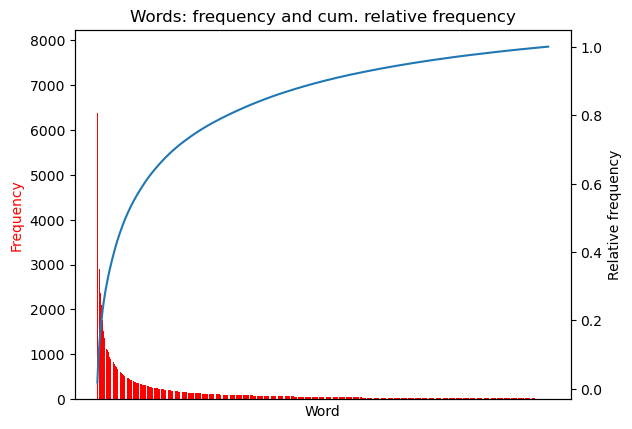

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Word")
ax1.set_ylabel("Frequency", color='red')
ax1.bar(word_freq.index, word_freq.values,
        color = 'red')

ax2 = ax1.twinx()
ax2.set_ylabel("Relative frequency")
ax2.plot(word_freq.index, word_freq.values.cumsum() / sum(word_freq.values))

plt.title("Words: frequency and cum. relative frequency")
plt.xticks([])
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(X, dense_output=False)

co_occ_pairs = []
word_list = cv.get_feature_names_out()

for i in range(len(word_list)):
    for j in range(i+1, len(word_list)):
        co_occ_pairs.append((word_list[i], word_list[j], cos_sim[i,j]))

co_occ_pairs.sort(key=lambda x: x[2], reverse=True)

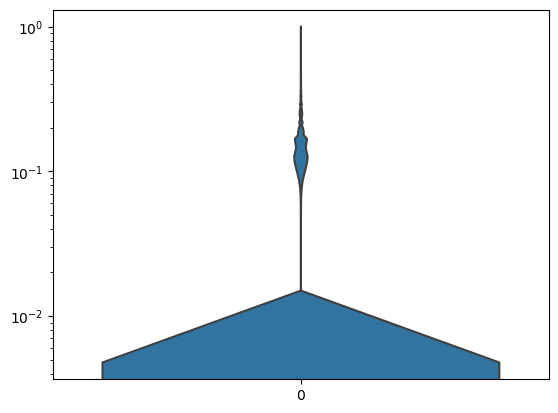

In [ ]:
sns.violinplot(pd.DataFrame(co_occ_pairs)[2])
plt.yscale('log')
plt.show()

### 'author''

In [ ]:
cv = CountVectorizer()

authors = dataset['author'].apply(lambda x: ','.join(map(str, x)) if x is not None else '')
X = cv.fit_transform(authors)

counts = X.sum(axis=0).A.ravel()
word_freq = pd.Series(counts, index=cv.get_feature_names_out()).sort_values(ascending=False)

In [ ]:
word_freq

wang          3556
li            3430
zhang         3101
liu           2966
chen          2918
              ... 
egorov           1
noack            1
noach            1
egorova          1
ṇikiforovs       1
Length: 50336, dtype: int64

<Axes: >

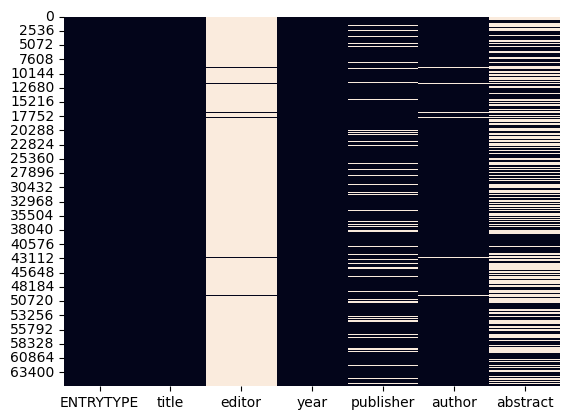

In [ ]:
sns.heatmap(dataset.isna(), cbar=False)

### Language identification

In [46]:
from lingua import Language, LanguageDetectorBuilder

detector = LanguageDetectorBuilder.from_all_languages().with_preloaded_language_models().build()

dataset['title_lang'] = [lang.name for lang in detector.detect_languages_in_parallel_of(dataset['title'])]

11        FRENCH
14        FRENCH
21        FRENCH
22         LATIN
23       CHINESE
          ...   
65860      LATIN
65864     FRENCH
65881     FRENCH
65905    TAGALOG
65912     DANISH
Name: title_lang, Length: 5039, dtype: object

<BarContainer object of 43 artists>

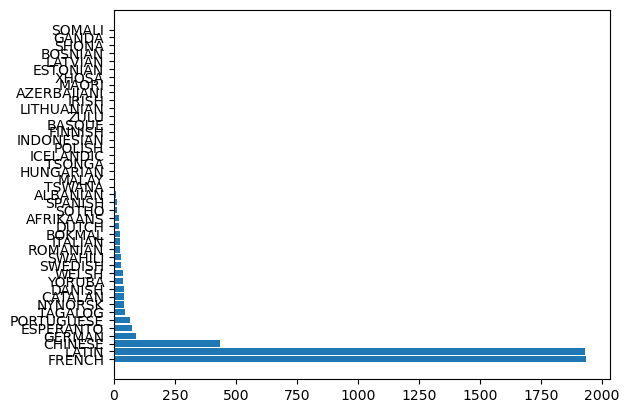

In [61]:
lang_counts = dataset[dataset['title_lang'] != 'ENGLISH']['title_lang'].value_counts()

plt.barh(lang_counts.index, lang_counts.values)